In [1]:
import xarray as xr
import pandas as pd 


In [67]:
ds = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/geo_em_updatedDEM.d01.nc")

In [68]:
gf = ds.GREENFRAC.isel(Time=0)

In [69]:
len(gf.month)

12

<xarray.DataArray 'GREENFRAC' (month: 12, south_north: 239, west_east: 179)>
[513372 values with dtype=float32]
Coordinates:
  * month    (month) datetime64[ns] 2010-01-01 2010-02-01 ... 2010-12-01
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    units:        fraction
    description:  MODIS FPAR
    stagger:      M
    sr_x:         1
    sr_y:         1

In [81]:
dates        = pd.date_range("2010-01-01", "2010-12-01", freq="MS")
dates_interp = pd.date_range("2010-01-01", "2011-01-01", freq="D")


In [73]:
gf = gf.assign_coords({"month":dates})

In [74]:
gf = gf.swap_dims({"month":"month"})

In [45]:
gf_daily = gf.resample(month='1D').nearest(tolerance="1D")

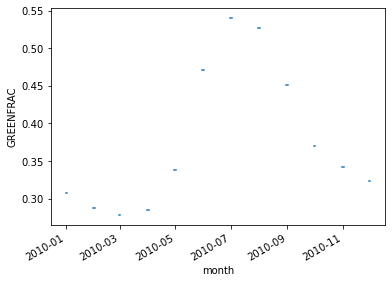

In [65]:
gf_daily.interp().mean(dim=("south_north", "west_east")).plot()

In [82]:
daily_gf = gf.interp(month=dates_interp)

/home/wrudisill/miniconda3/envs/wrfplotenv/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


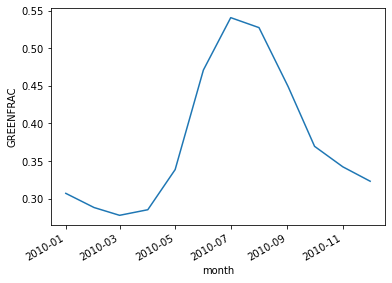

In [84]:
daily_gf.mean(dim=("south_north", "west_east")).plot()

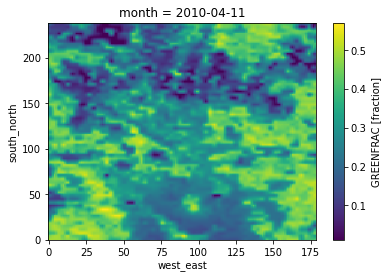

In [88]:
daily_gf.isel(month=100).plot()

In [91]:
daily_gf = daily_gf.rename({"month":"time"})

In [92]:
daily_gf.to_netcdf("daily_vegfrac")

In [96]:
vgdata = xr.open_dataset("/home/wrudisill/scratch/EastLSM_Only/most_recent_aso_data/daily_vegfrac.nc")

vgdate = pd.to_datetime("2010-01-05")
vgdata = vgdata.sel(time=vgdate)

In [98]:
vgdata.GREENFRAC

<xarray.DataArray 'GREENFRAC' (south_north: 239, west_east: 179)>
array([[0.526614, 0.532154, 0.541431, ..., 0.419953, 0.441604, 0.461248],
       [0.523538, 0.527488, 0.540164, ..., 0.444311, 0.444747, 0.451094],
       [0.518053, 0.524643, 0.535891, ..., 0.436457, 0.427697, 0.426343],
       ...,
       [0.151661, 0.135254, 0.120679, ..., 0.099999, 0.010252, 0.057021],
       [0.170593, 0.152556, 0.134423, ..., 0.093566, 0.010234, 0.035788],
       [0.189502, 0.169953, 0.148152, ..., 0.086678, 0.010012, 0.014503]])
Coordinates:
    time     datetime64[ns] 2010-01-05
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    units:        fraction
    description:  MODIS FPAR
    stagger:      M
    sr_x:         1
    sr_y:         1